CSV counts per</br>
crash_year </br>
2012    100545 </br>
2013    203742 </br> 
2014    206034 </br>
2015    217694 </br>
2016    229831 </br>
2017    231007 </br>
2018    231564 </br>
2019    211486 </br>
2020    112916 </br>
2021    110550 </br>
2022    103882 </br>
2023     96573 </br>
2024     19603 </br>

JSON COUNTS PER </br>
crash_year  </br>
2012    100545 </br>
2013    203779 </br>
2014    206003 </br>
2015    217694 </br>
2016    229839 </br>
2017    230993 </br>
2018    231602 </br>
2019    211456 </br>
2020    112893 </br>
2021    110549 </br>
2022    103907 </br>
2023     96582 </br>
2024     25766 </br>

In [3]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import os
import utils
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# define the path to the dataset
data_folder = '../data/crash_records_transformed/'

In [5]:
# Create a ParquetDataset from the partitioned files
dataset = pq.ParquetDataset(data_folder)

# Read the dataset into a PyArrow Table
table = dataset.read()

# Convert the PyArrow Table to a pandas DataFrame
collisions_df = table.to_pandas()

# Optionally, reset the index if you want a fresh sequential index
collisions_df.reset_index(drop=True, inplace=True)

# Now, collisions_df contains all the data from your partitioned parquet files
print(collisions_df.shape)


(2081116, 38)


In [31]:
print('min_date', collisions_df.crash_date.min(), 'max date', collisions_df.crash_date.max())
print(collisions_df.shape)



min_date 2012-07-01 max date 2024-04-16
(2081116, 38)


In [11]:
collisions = [4491159,4491487,4491223,4491418,4491395,4491529]
collisions_df.loc[collisions_df['collision_id'].isin(collisions),['collision_id', 'latitude', 'longitude', 'crash_date', 'crash_time']]



,collision_id,latitude,longitude,crash_date,crash_time
1855184,4491159,40.850180,-73.910590,2022-01-01,4:33
1855187,4491223,40.823673,-73.872330,2022-01-01,10:42
1855193,4491395,40.820984,-73.891624,2022-01-02,0:32
1855197,4491418,40.863945,-73.864520,2022-01-01,20:55
1855206,4491487,40.871550,-73.864280,2022-01-01,5:55
1855209,4491529,40.882217,-73.880460,2022-01-02,1:22


In [18]:
print(collisions_df['neighborhood'].nunique())
zipcode_counts = collisions_df.groupby('neighborhood').agg({'borough':'nunique'}).sum()
zipcode_counts

257


borough    541
dtype: int64

# HISTOGRAMS

In [35]:
collisions_per_day = collisions_df.groupby('crash_date').size().sort_index()
crash_per_day = collisions_df['crash_date'].value_counts().sort_index()
injuries_per_day = collisions_df.groupby('crash_date')['number_of_persons_injured'].sum().sort_index()

cutoff_date = pd.Timestamp('2020-03-01').date()

collisions_per_day_pre_covid = collisions_per_day.loc[:cutoff_date]
injuries_per_day_pre_covid = injuries_per_day.loc[:cutoff_date]
collisions_per_day_covid = collisions_per_day.loc[cutoff_date:]
injuries_per_day_covid = injuries_per_day.loc[cutoff_date:]

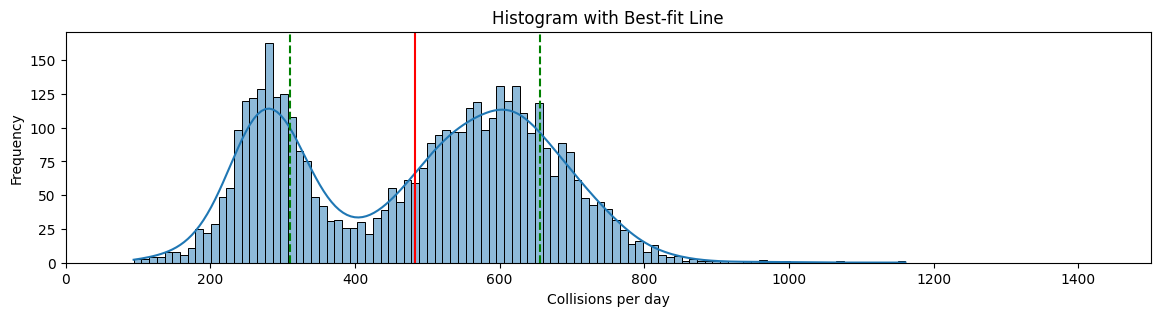

In [36]:
plt.figure(figsize=(14, 3))

var = crash_per_day
sns.histplot(var, bins=100, kde=True)

plt.xlim(0, 1500)

plt.axvline(var.mean(), color='red', label='Mean')
plt.axvline(var.mean() - var.std(), color='green', linestyle='--', label='Std Dev')
plt.axvline(var.mean() + var.std(), color='green', linestyle='--')

# Add labels and a title
plt.xlabel("Collisions per day")
plt.ylabel("Frequency")
plt.title("Histogram with Best-fit Line")

# Show the plot
plt.show()

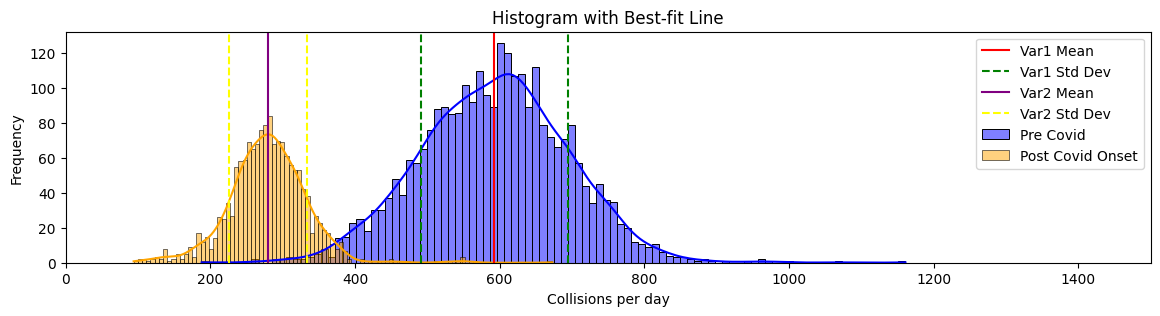

In [37]:
plt.figure(figsize=(14, 3))

# Plot var
var = collisions_per_day_pre_covid
sns.histplot(var, bins=100, kde=True, color='blue', label='Pre Covid')

# Plot var2
var2 = collisions_per_day_covid
sns.histplot(var2, bins=100, kde=True, color='orange', label='Post Covid Onset')

# Set x-axis limits
plt.xlim(0, 1500)

# Add vertical lines for var1
plt.axvline(var.mean(), color='red', label='Var1 Mean')
plt.axvline(var.mean() - var.std(), color='green', linestyle='--', label='Var1 Std Dev')
plt.axvline(var.mean() + var.std(), color='green', linestyle='--')

# Add vertical lines for var2
plt.axvline(var2.mean(), color='purple', label='Var2 Mean')
plt.axvline(var2.mean() - var2.std(), color='yellow', linestyle='--', label='Var2 Std Dev')
plt.axvline(var2.mean() + var2.std(), color='yellow', linestyle='--')

# Add labels and a title
plt.xlabel("Collisions per day")
plt.ylabel("Frequency")
plt.title("Histogram with Best-fit Line")

# Add legend
plt.legend()

# Show the plot
plt.show()


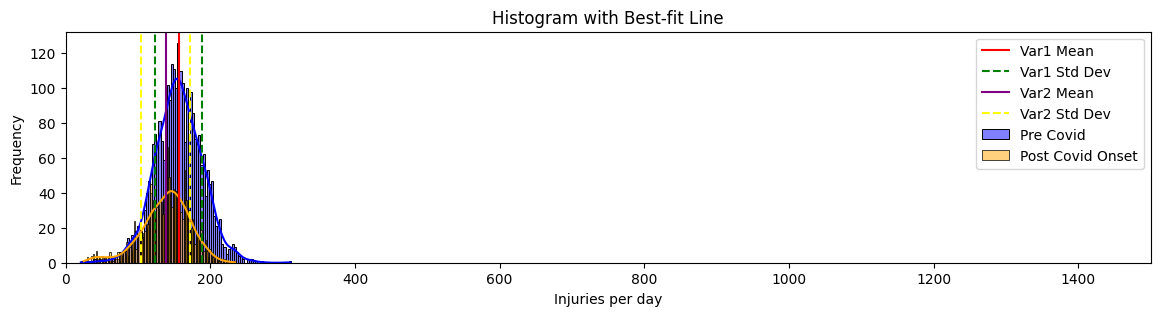

In [38]:
plt.figure(figsize=(14, 3))

# Plot var
var = injuries_per_day_pre_covid
sns.histplot(var, bins=100, kde=True, color='blue', label='Pre Covid')

# Plot var2
var2 = injuries_per_day_covid
sns.histplot(var2, bins=100, kde=True, color='orange', label='Post Covid Onset')

# Set x-axis limits
plt.xlim(0, 1500)

# Add vertical lines for var1
plt.axvline(var.mean(), color='red', label='Var1 Mean')
plt.axvline(var.mean() - var.std(), color='green', linestyle='--', label='Var1 Std Dev')
plt.axvline(var.mean() + var.std(), color='green', linestyle='--')

# Add vertical lines for var2
plt.axvline(var2.mean(), color='purple', label='Var2 Mean')
plt.axvline(var2.mean() - var2.std(), color='yellow', linestyle='--', label='Var2 Std Dev')
plt.axvline(var2.mean() + var2.std(), color='yellow', linestyle='--')

# Add labels and a title
plt.xlabel("Injuries per day")
plt.ylabel("Frequency")
plt.title("Histogram with Best-fit Line")

# Add legend
plt.legend()

# Show the plot
plt.show()


# TRENDS

In [6]:
collisions_df['crash_year'].value_counts().sort_index()

crash_year
2012    100545
2013    203742
2014    206003
2015    217684
2016    229804
2017    230993
2018    231564
2019    211404
2020    112893
2021    110549
2022    103786
2023     96417
2024     25732
Name: count, dtype: int64

In [14]:
print(df_without_duplicates['latitude'].isna().sum())
df_without_duplicates['borough'].value_counts().sort_index()

238402


borough
Bronx            281480
Brooklyn         571000
Manhattan        399372
None             206234
Queens           531829
Staten_Island     91201
Name: count, dtype: int64

In [10]:
df_without_duplicates = collisions_df.drop_duplicates(keep='last')
df_without_duplicates['crash_month_year'].value_counts().sort_index()


crash_month_year
2012-07    16992
2012-08    17142
2012-09    16535
2012-10    16864
2012-11    15889
           ...  
2023-12     7903
2024-01     7514
2024-02     6806
2024-03     7791
2024-04     3621
Name: count, Length: 142, dtype: int64

<Axes: title={'center': 'Number of Collisions per Month'}, xlabel='crash_month_year'>

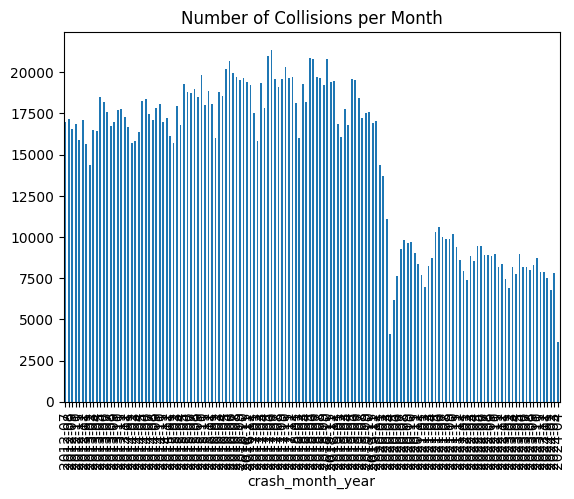

In [11]:
collisions_df['crash_month_year'].value_counts().sort_index().plot(kind='bar', title='Number of Collisions per Month')

<Axes: title={'center': 'Number of Collisions per Year'}, xlabel='crash_year'>

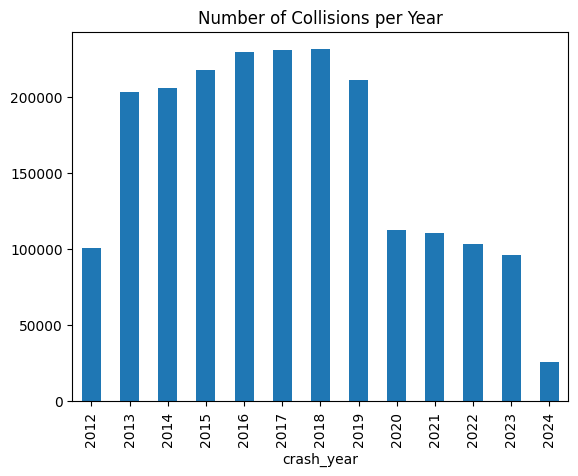

In [40]:
collisions_df['crash_year'].value_counts().sort_index().plot(kind='bar', title='Number of Collisions per Year')

In [41]:
counts_per_month_year = collisions_df['crash_month_year'].value_counts().sort_index()
injuries_per_month_year = collisions_df.groupby('crash_month_year')['number_of_persons_injured'].sum().sort_index()
deaths_per_month_year = collisions_df.groupby('crash_month_year')['number_of_persons_killed'].sum().sort_index()

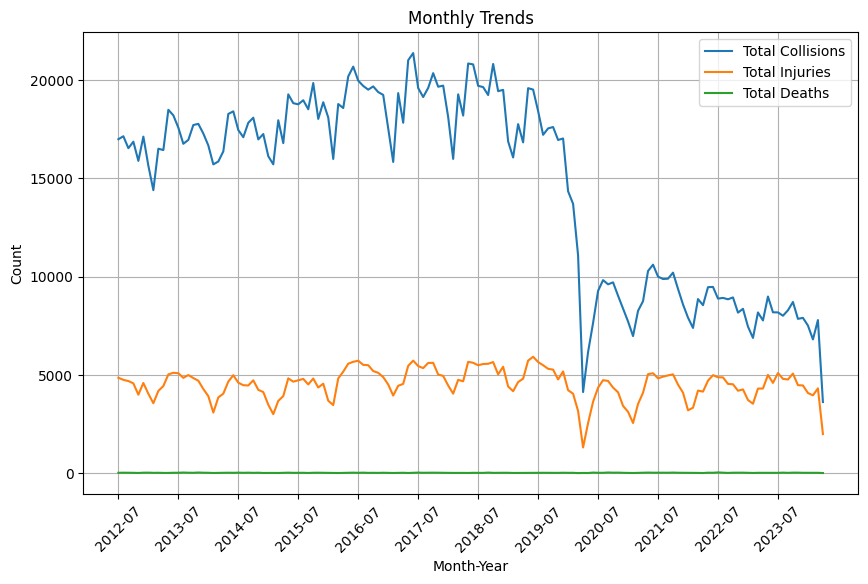

In [42]:
# Create a figure with a specific size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Plotting counts_per_month_year
plt.plot(counts_per_month_year.index, counts_per_month_year.values, label='Total Collisions')

# Plotting injuries_per_year
plt.plot(injuries_per_month_year.index, injuries_per_month_year.values, label='Total Injuries')

# Plotting deaths_per_month_year
plt.plot(deaths_per_month_year.index, deaths_per_month_year.values, label='Total Deaths')

# Add labels and title
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.title('Monthly Trends')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid(True)  # Show grid

# Set ticks for every year
plt.xticks(range(0, len(counts_per_month_year.index), 12), counts_per_month_year.index[::12], rotation=45)


# Show plot
plt.show()

In [43]:
collisions_df.columns

Index(['crash_date', 'crash_time', 'on_street_name', 'off_street_name',
       'number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2',
       'collision_id', 'vehicle_type_code1', 'vehicle_type_code2', 'zip_code',
       'latitude', 'longitude', 'cross_street_name',
       'contributing_factor_vehicle_3', 'vehicle_type_code_3',
       'contributing_factor_vehicle_4', 'vehicle_type_code_4',
       'contributing_factor_vehicle_5', 'vehicle_type_code_5',
       'crash_datetime', 'crash_day', 'crash_weekday', 'crash_hour',
       'crash_month_year', 'severity', 'sun_phase', 'neighborhood',
       'crash_year', 'crash_month', 'borough'],
      dtype='object')

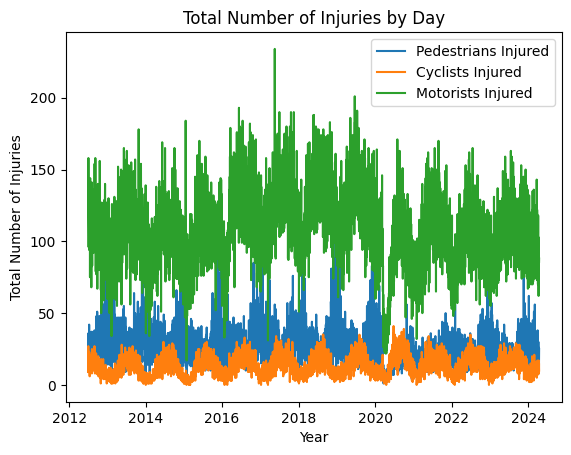

In [58]:
# Group by year and sum the values for each year for all three columns
grouped_df = collisions_df.groupby(collisions_df['crash_datetime'].dt.date)[['number_of_pedestrians_injured', 'number_of_cyclist_injured', 'number_of_motorist_injured']].sum()

# Plotting
plt.plot(grouped_df.index, grouped_df['number_of_pedestrians_injured'], label='Pedestrians Injured')
plt.plot(grouped_df.index, grouped_df['number_of_cyclist_injured'], label='Cyclists Injured')
plt.plot(grouped_df.index, grouped_df['number_of_motorist_injured'], label='Motorists Injured')

plt.xlabel('Year')
plt.ylabel('Total Number of Injuries')
plt.title('Total Number of Injuries by Day')
plt.legend()
plt.show()

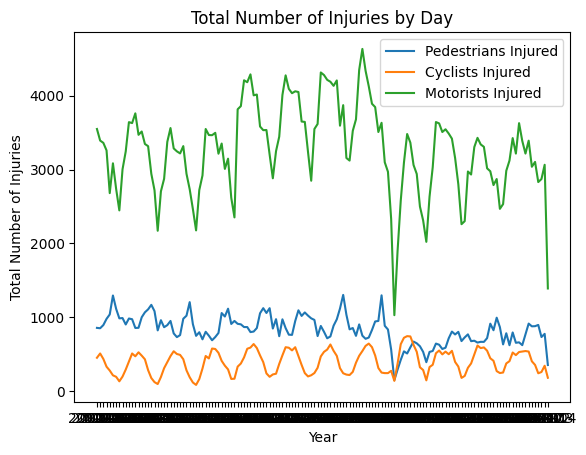

In [63]:
# Group by year and sum the values for each year for all three columns
grouped_df = collisions_df.groupby(collisions_df['crash_month_year'])[['number_of_pedestrians_injured', 'number_of_cyclist_injured', 'number_of_motorist_injured']].sum()

# Plotting
plt.plot(grouped_df.index, grouped_df['number_of_pedestrians_injured'], label='Pedestrians Injured')
plt.plot(grouped_df.index, grouped_df['number_of_cyclist_injured'], label='Cyclists Injured')
plt.plot(grouped_df.index, grouped_df['number_of_motorist_injured'], label='Motorists Injured')

plt.xlabel('Year')
plt.ylabel('Total Number of Injuries')
plt.title('Total Number of Injuries by Day')
plt.legend()
plt.show()

In [10]:
counts_per_year = collisions_df['crash_year'].value_counts().sort_index()
injuries_per_year = collisions_df.groupby('crash_year')['number_of_persons_injured'].sum().sort_index()
deaths_per_year = collisions_df.groupby('crash_year')['number_of_persons_killed'].sum().sort_index()

/tmp/ipykernel_2978681/1458025837.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  injuries_per_year = collisions_df.groupby('crash_year')['number_of_persons_injured'].sum().sort_index()
/tmp/ipykernel_2978681/1458025837.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  deaths_per_year = collisions_df.groupby('crash_year')['number_of_persons_killed'].sum().sort_index()


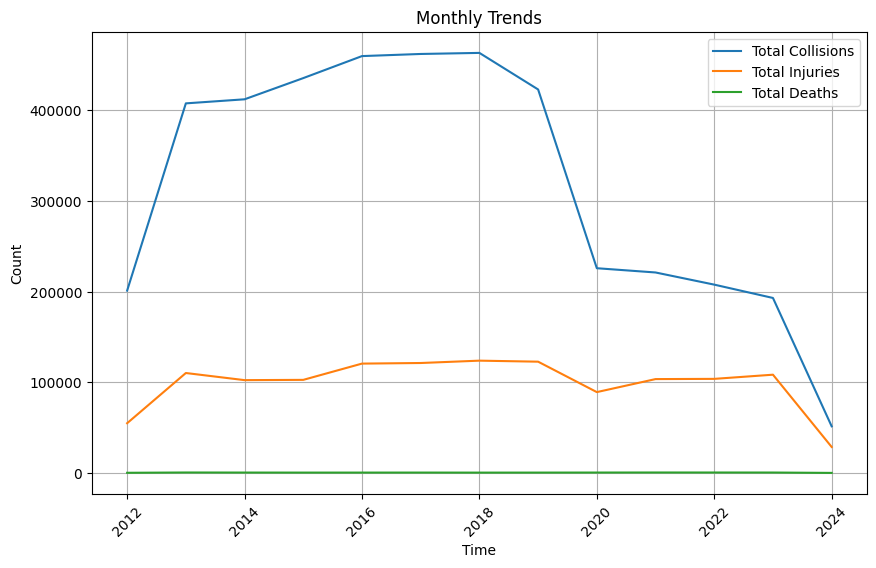

In [11]:
# Create a figure with a specific size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Plotting counts_per_year
plt.plot(counts_per_year.index, counts_per_year.values, label='Total Collisions')

# Plotting injuries_per_year
plt.plot(injuries_per_year.index, injuries_per_year.values, label='Total Injuries')

# Plotting deaths_per_year
plt.plot(deaths_per_year.index, deaths_per_year.values, label='Total Deaths')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Monthly Trends')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid(True)  # Show grid


# Show plot
plt.show()

In [12]:
ped_inj_per_month_year = collisions_df.groupby('crash_month_year')['number_of_pedestrians_injured'].sum().sort_index()
cycl_inj_per_month_year = collisions_df.groupby('crash_month_year')['number_of_cyclist_injured'].sum().sort_index()
mot_inj_per_month_year = collisions_df.groupby('crash_month_year')['number_of_motorist_injured'].sum().sort_index()

ped_killed_per_month_year = collisions_df.groupby('crash_month_year')['number_of_pedestrians_killed'].sum().sort_index()
cycl_killed_per_month_year = collisions_df.groupby('crash_month_year')['number_of_cyclist_killed'].sum().sort_index()
mot_killed_per_month_year = collisions_df.groupby('crash_month_year')['number_of_motorist_killed'].sum().sort_index()


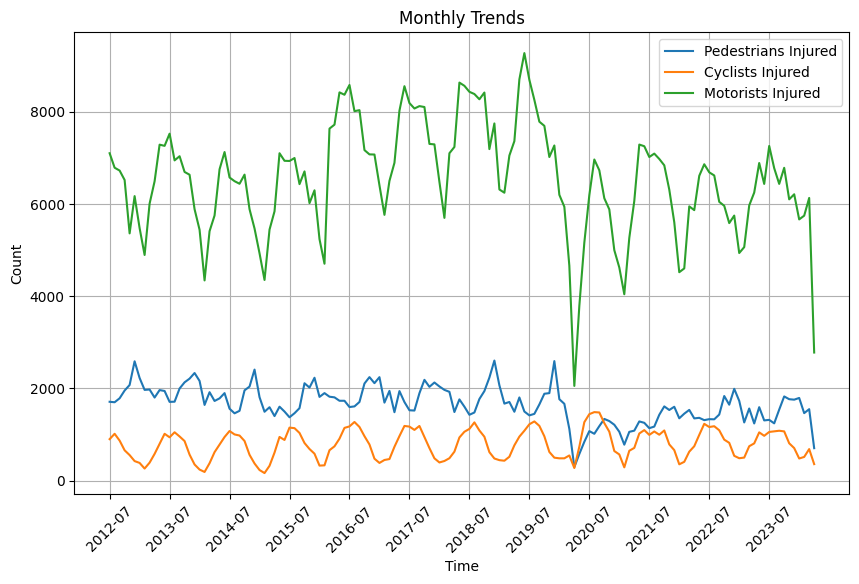

In [13]:
# Create a figure with a specific size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Plotting ped_inj_per_month_year
plt.plot(ped_inj_per_month_year.index, ped_inj_per_month_year.values, label='Pedestrians Injured')

# Plotting cycl_inj_per_month_year
plt.plot(cycl_inj_per_month_year.index, cycl_inj_per_month_year.values, label='Cyclists Injured')

# Plotting mot_inj_per_month_year
plt.plot(mot_inj_per_month_year.index, mot_inj_per_month_year.values, label='Motorists Injured')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Monthly Trends')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid(True)  # Show grid

# Set ticks for every year
plt.xticks(range(0, len(ped_inj_per_month_year.index), 12), ped_inj_per_month_year.index[::12], rotation=45)


# Show plot
plt.show()

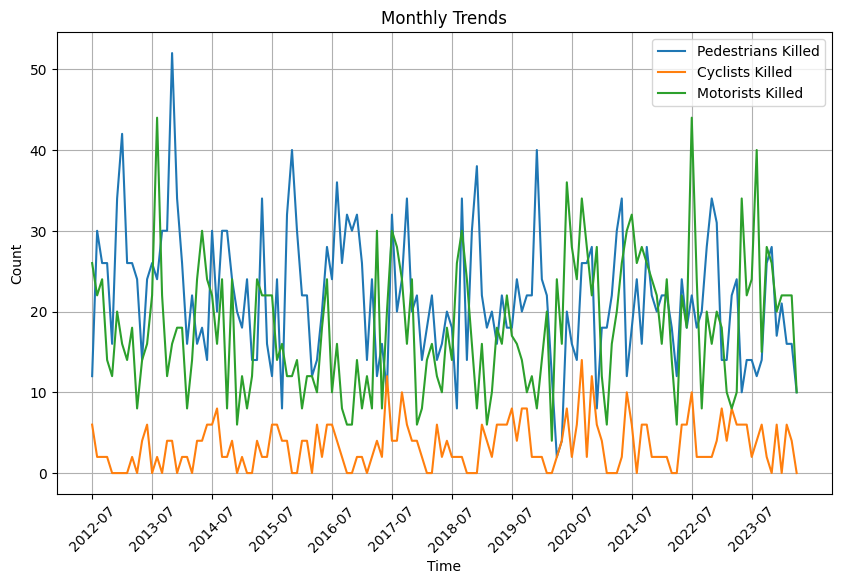

In [14]:
# Create a figure with a specific size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Plotting ped_killed_per_month_year
plt.plot(ped_killed_per_month_year.index, ped_killed_per_month_year.values, label='Pedestrians Killed')

# Plotting cycl_killed_per_month_year
plt.plot(cycl_killed_per_month_year.index, cycl_killed_per_month_year.values, label='Cyclists Killed')

# Plotting mot_killed_per_month_year
plt.plot(mot_killed_per_month_year.index, mot_killed_per_month_year.values, label='Motorists Killed')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Monthly Trends')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid(True)  # Show grid

# Set ticks for every year
plt.xticks(range(0, len(ped_inj_per_month_year.index), 12), ped_inj_per_month_year.index[::12], rotation=45)


# Show plot
plt.show()

In [15]:
ped_inj_per_year = collisions_df.groupby('crash_year')['number_of_pedestrians_injured'].sum().sort_index()
cycl_inj_per_year = collisions_df.groupby('crash_year')['number_of_cyclist_injured'].sum().sort_index()
mot_inj_per_year = collisions_df.groupby('crash_year')['number_of_motorist_injured'].sum().sort_index()

ped_killed_per_year = collisions_df.groupby('crash_year')['number_of_pedestrians_killed'].sum().sort_index()
cycl_killed_per_year = collisions_df.groupby('crash_year')['number_of_cyclist_killed'].sum().sort_index()
mot_killed_per_year = collisions_df.groupby('crash_year')['number_of_motorist_killed'].sum().sort_index()

/tmp/ipykernel_2978681/705776650.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ped_inj_per_year = collisions_df.groupby('crash_year')['number_of_pedestrians_injured'].sum().sort_index()
/tmp/ipykernel_2978681/705776650.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cycl_inj_per_year = collisions_df.groupby('crash_year')['number_of_cyclist_injured'].sum().sort_index()
/tmp/ipykernel_2978681/705776650.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the f

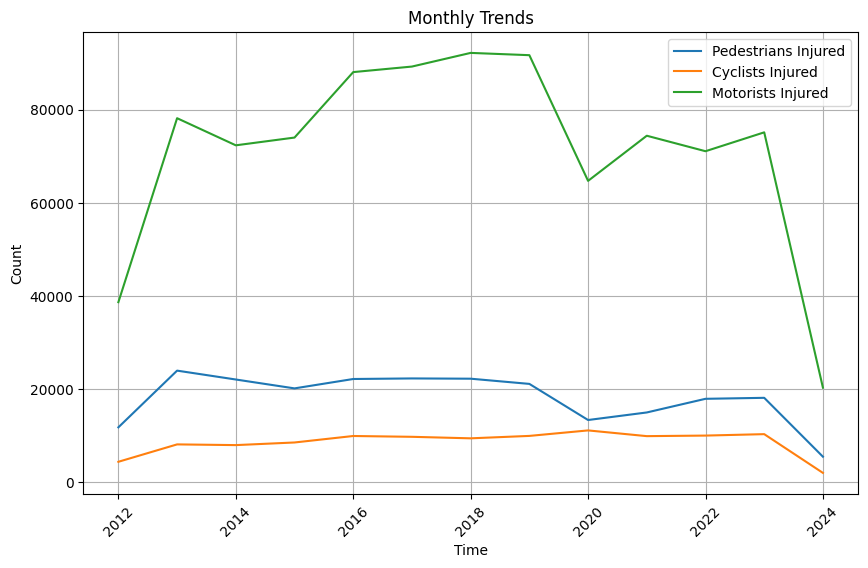

In [16]:
# Create a figure with a specific size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Plotting ped_inj_per_year
plt.plot(ped_inj_per_year.index, ped_inj_per_year.values, label='Pedestrians Injured')

# Plotting cycl_inj_per_year
plt.plot(cycl_inj_per_year.index, cycl_inj_per_year.values, label='Cyclists Injured')

# Plotting mot_inj_per_year
plt.plot(mot_inj_per_year.index, mot_inj_per_year.values, label='Motorists Injured')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Monthly Trends')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid(True)  # Show grid

# Show plot
plt.show()

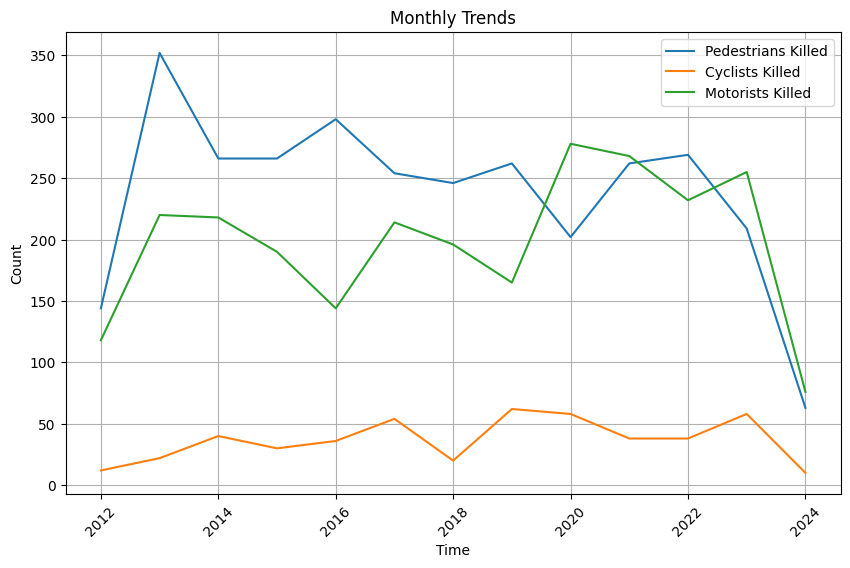

In [17]:
# Create a figure with a specific size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Plotting ped_killed_per_year
plt.plot(ped_killed_per_year.index, ped_killed_per_year.values, label='Pedestrians Killed')

# Plotting cycl_killed_per_year
plt.plot(cycl_killed_per_year.index, cycl_killed_per_year.values, label='Cyclists Killed')

# Plotting mot_killed_per_year
plt.plot(mot_killed_per_year.index, mot_killed_per_year.values, label='Motorists Killed')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Monthly Trends')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid(True)  # Show grid

# Show plot
plt.show()